In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aQtezwwShZ5PLACCdz9e")
project = rf.workspace("buildx").project("weapon-detection-7kro8")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weapon-Detection--2 in yolov11:: 100%|██████████| 19058/19058 [00:02<00:00, 7819.67it/s]


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27  Python-3.10.11 torch-2.5.1+cpu CPU (Intel Core(TM) i7-7500U 2.70GHz)
Setup complete  (4 CPUs, 7.9 GB RAM, 110.1/118.6 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data=/kaggle/working/Weapon-Detection--2/data.yaml  epochs=20 imgsz=640 batch=16

100%|███████████████████████████████████████| 49.0M/49.0M [00:00<00:00, 113MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/kaggle/working/Weapon-Detection--2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

In [ ]:
from IPython.display import Image, display

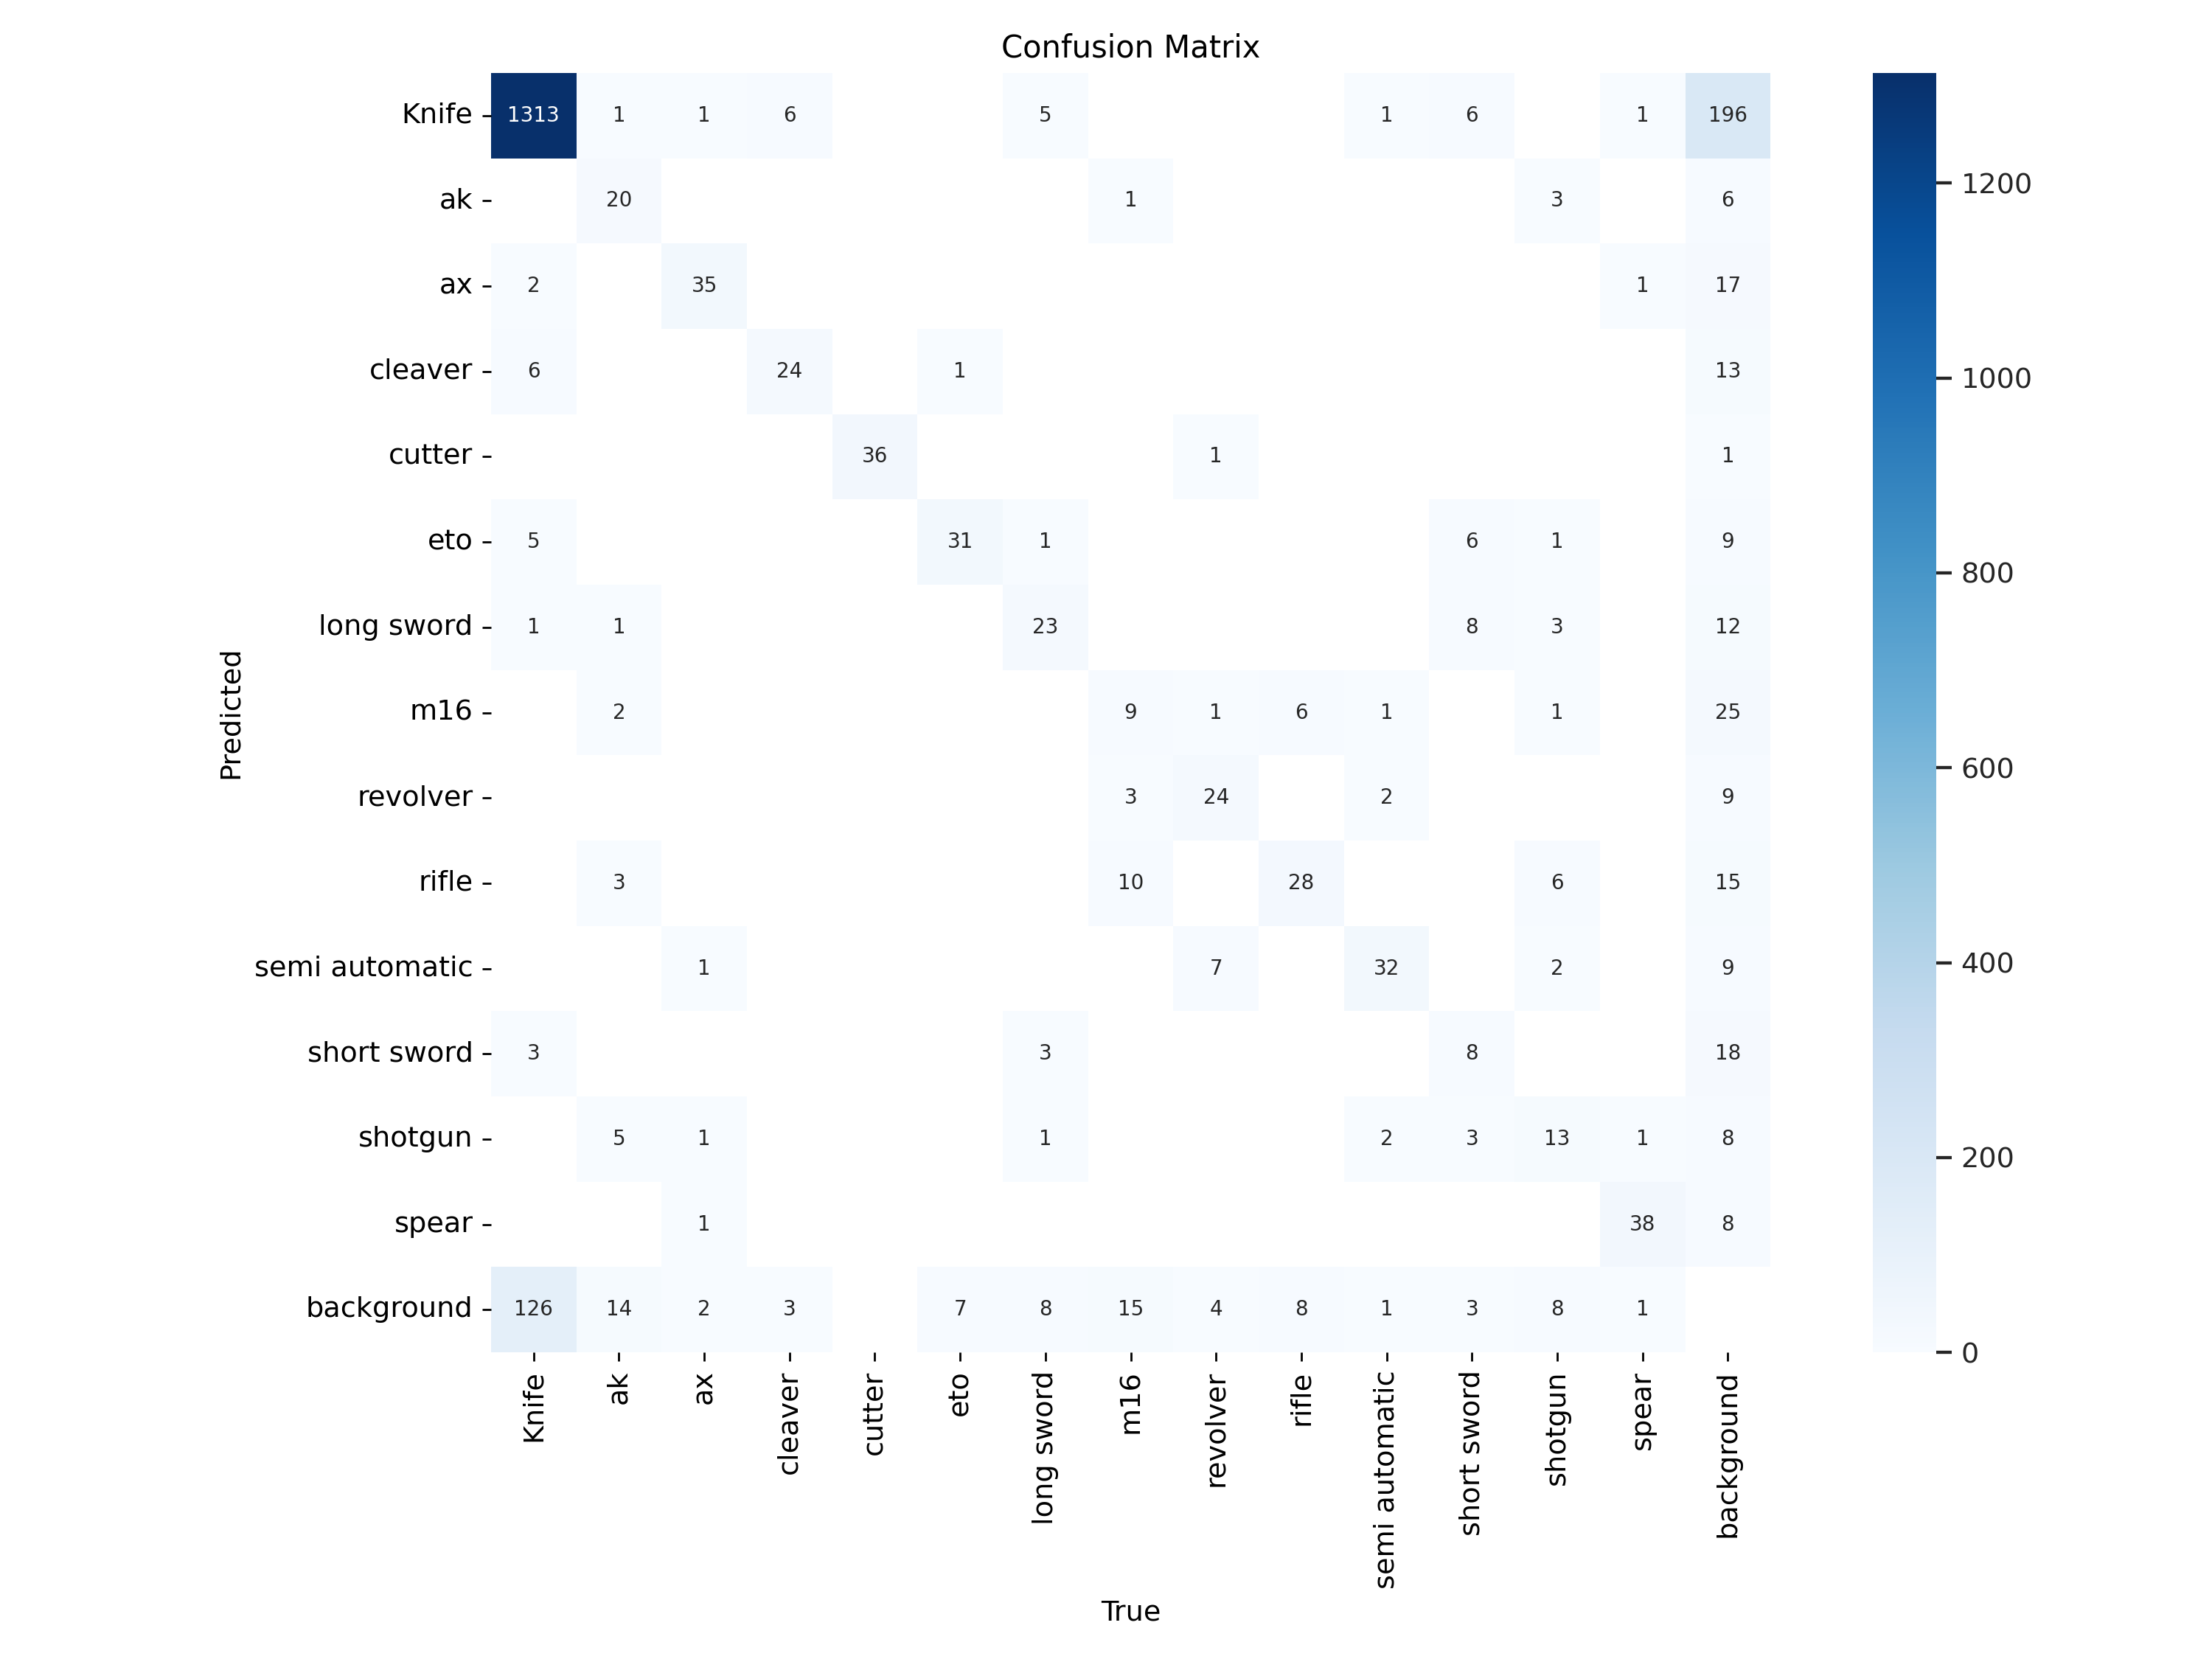

In [ ]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

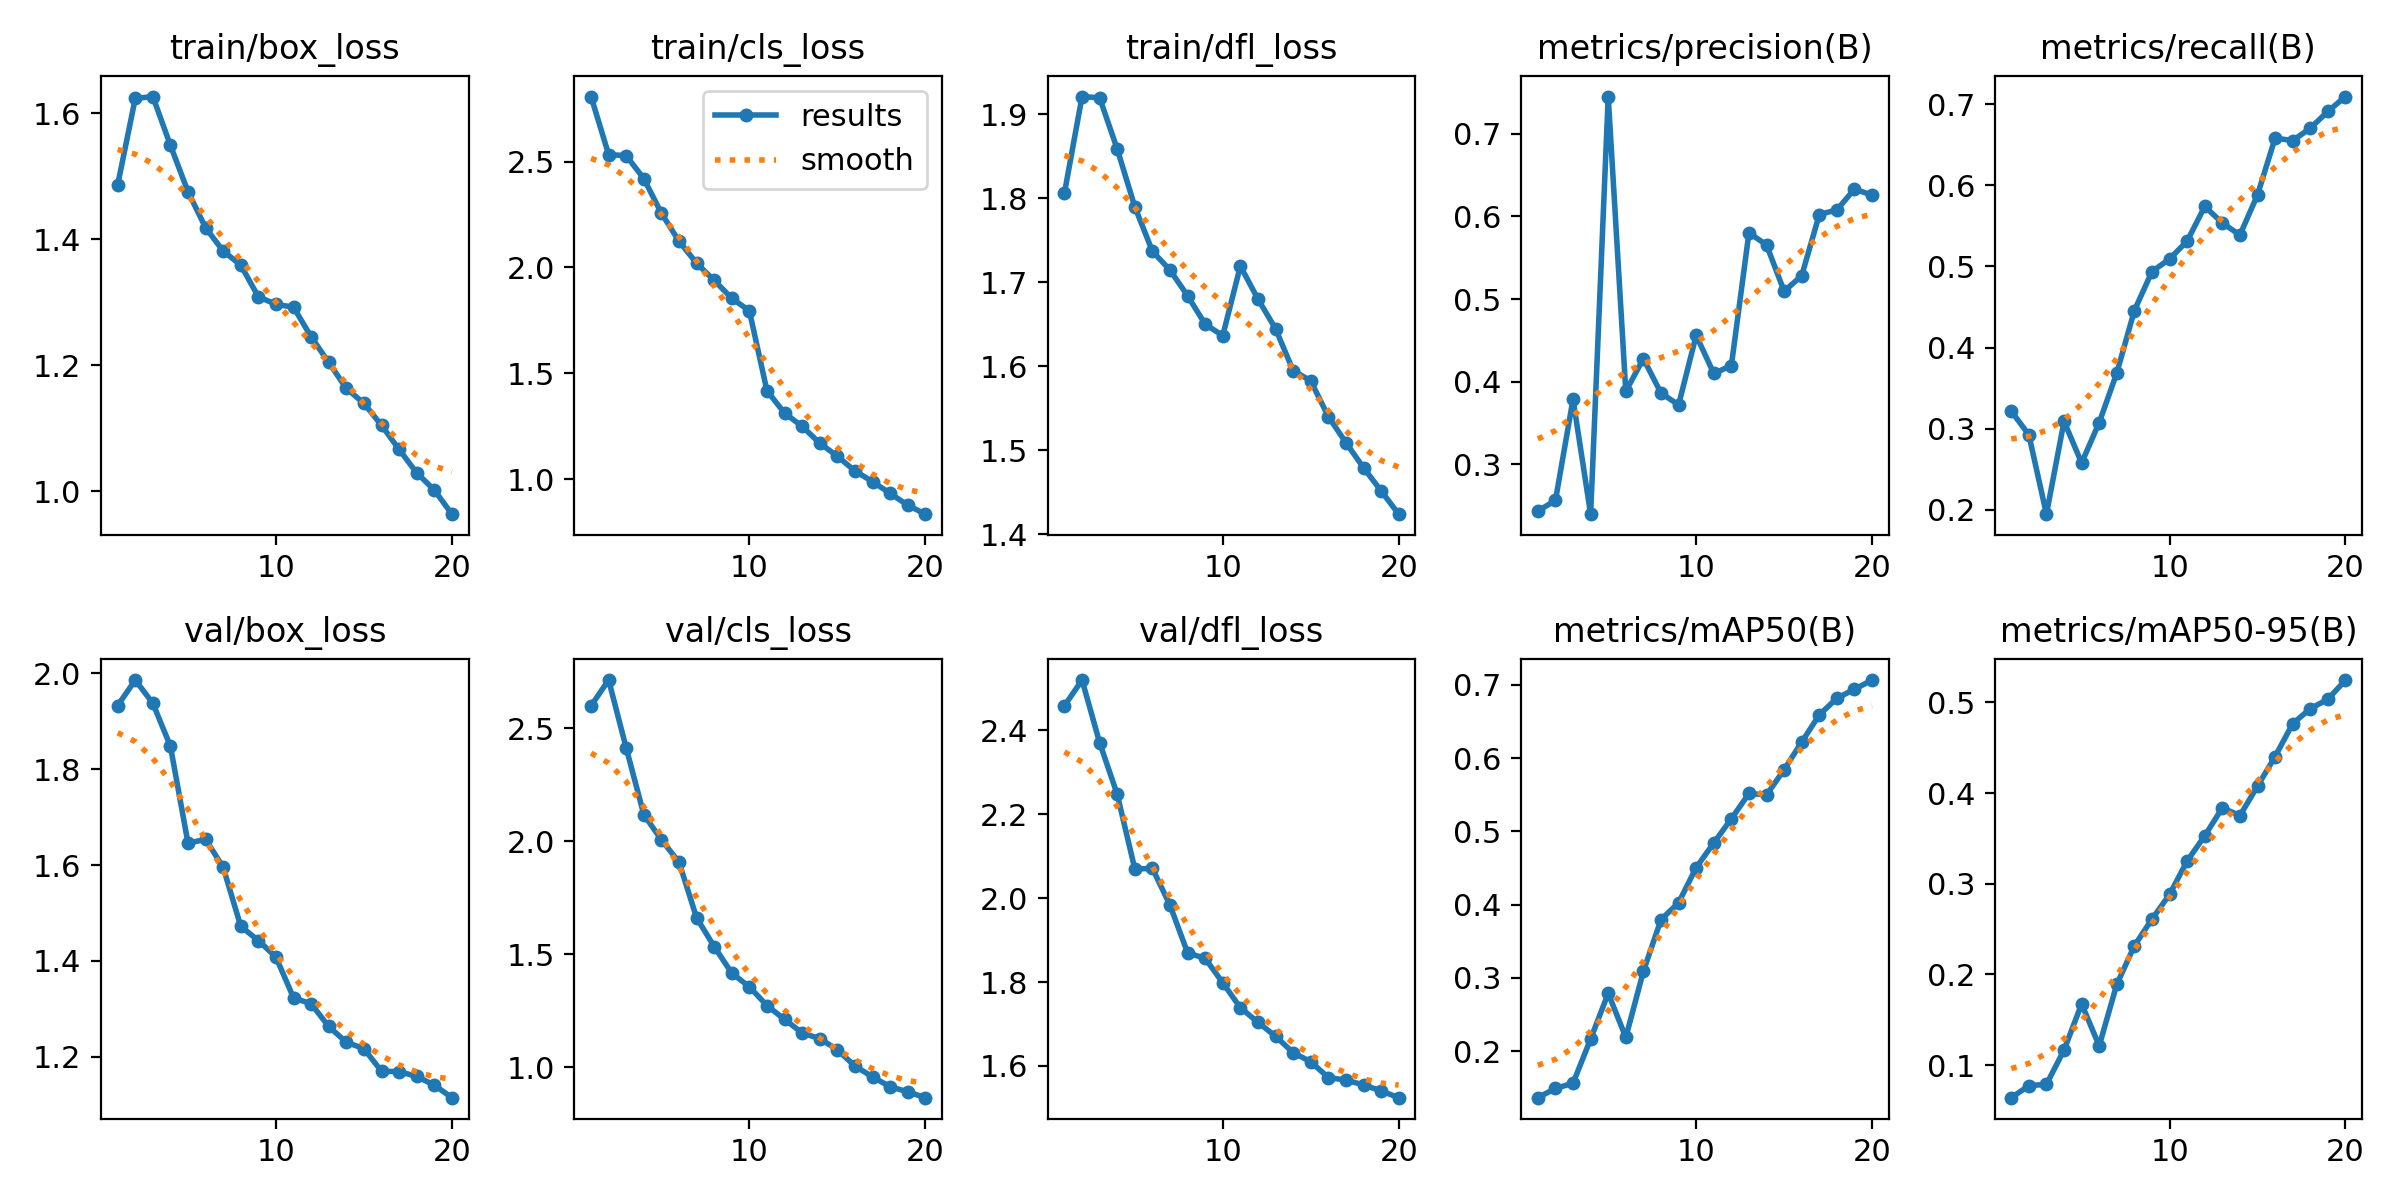

In [ ]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

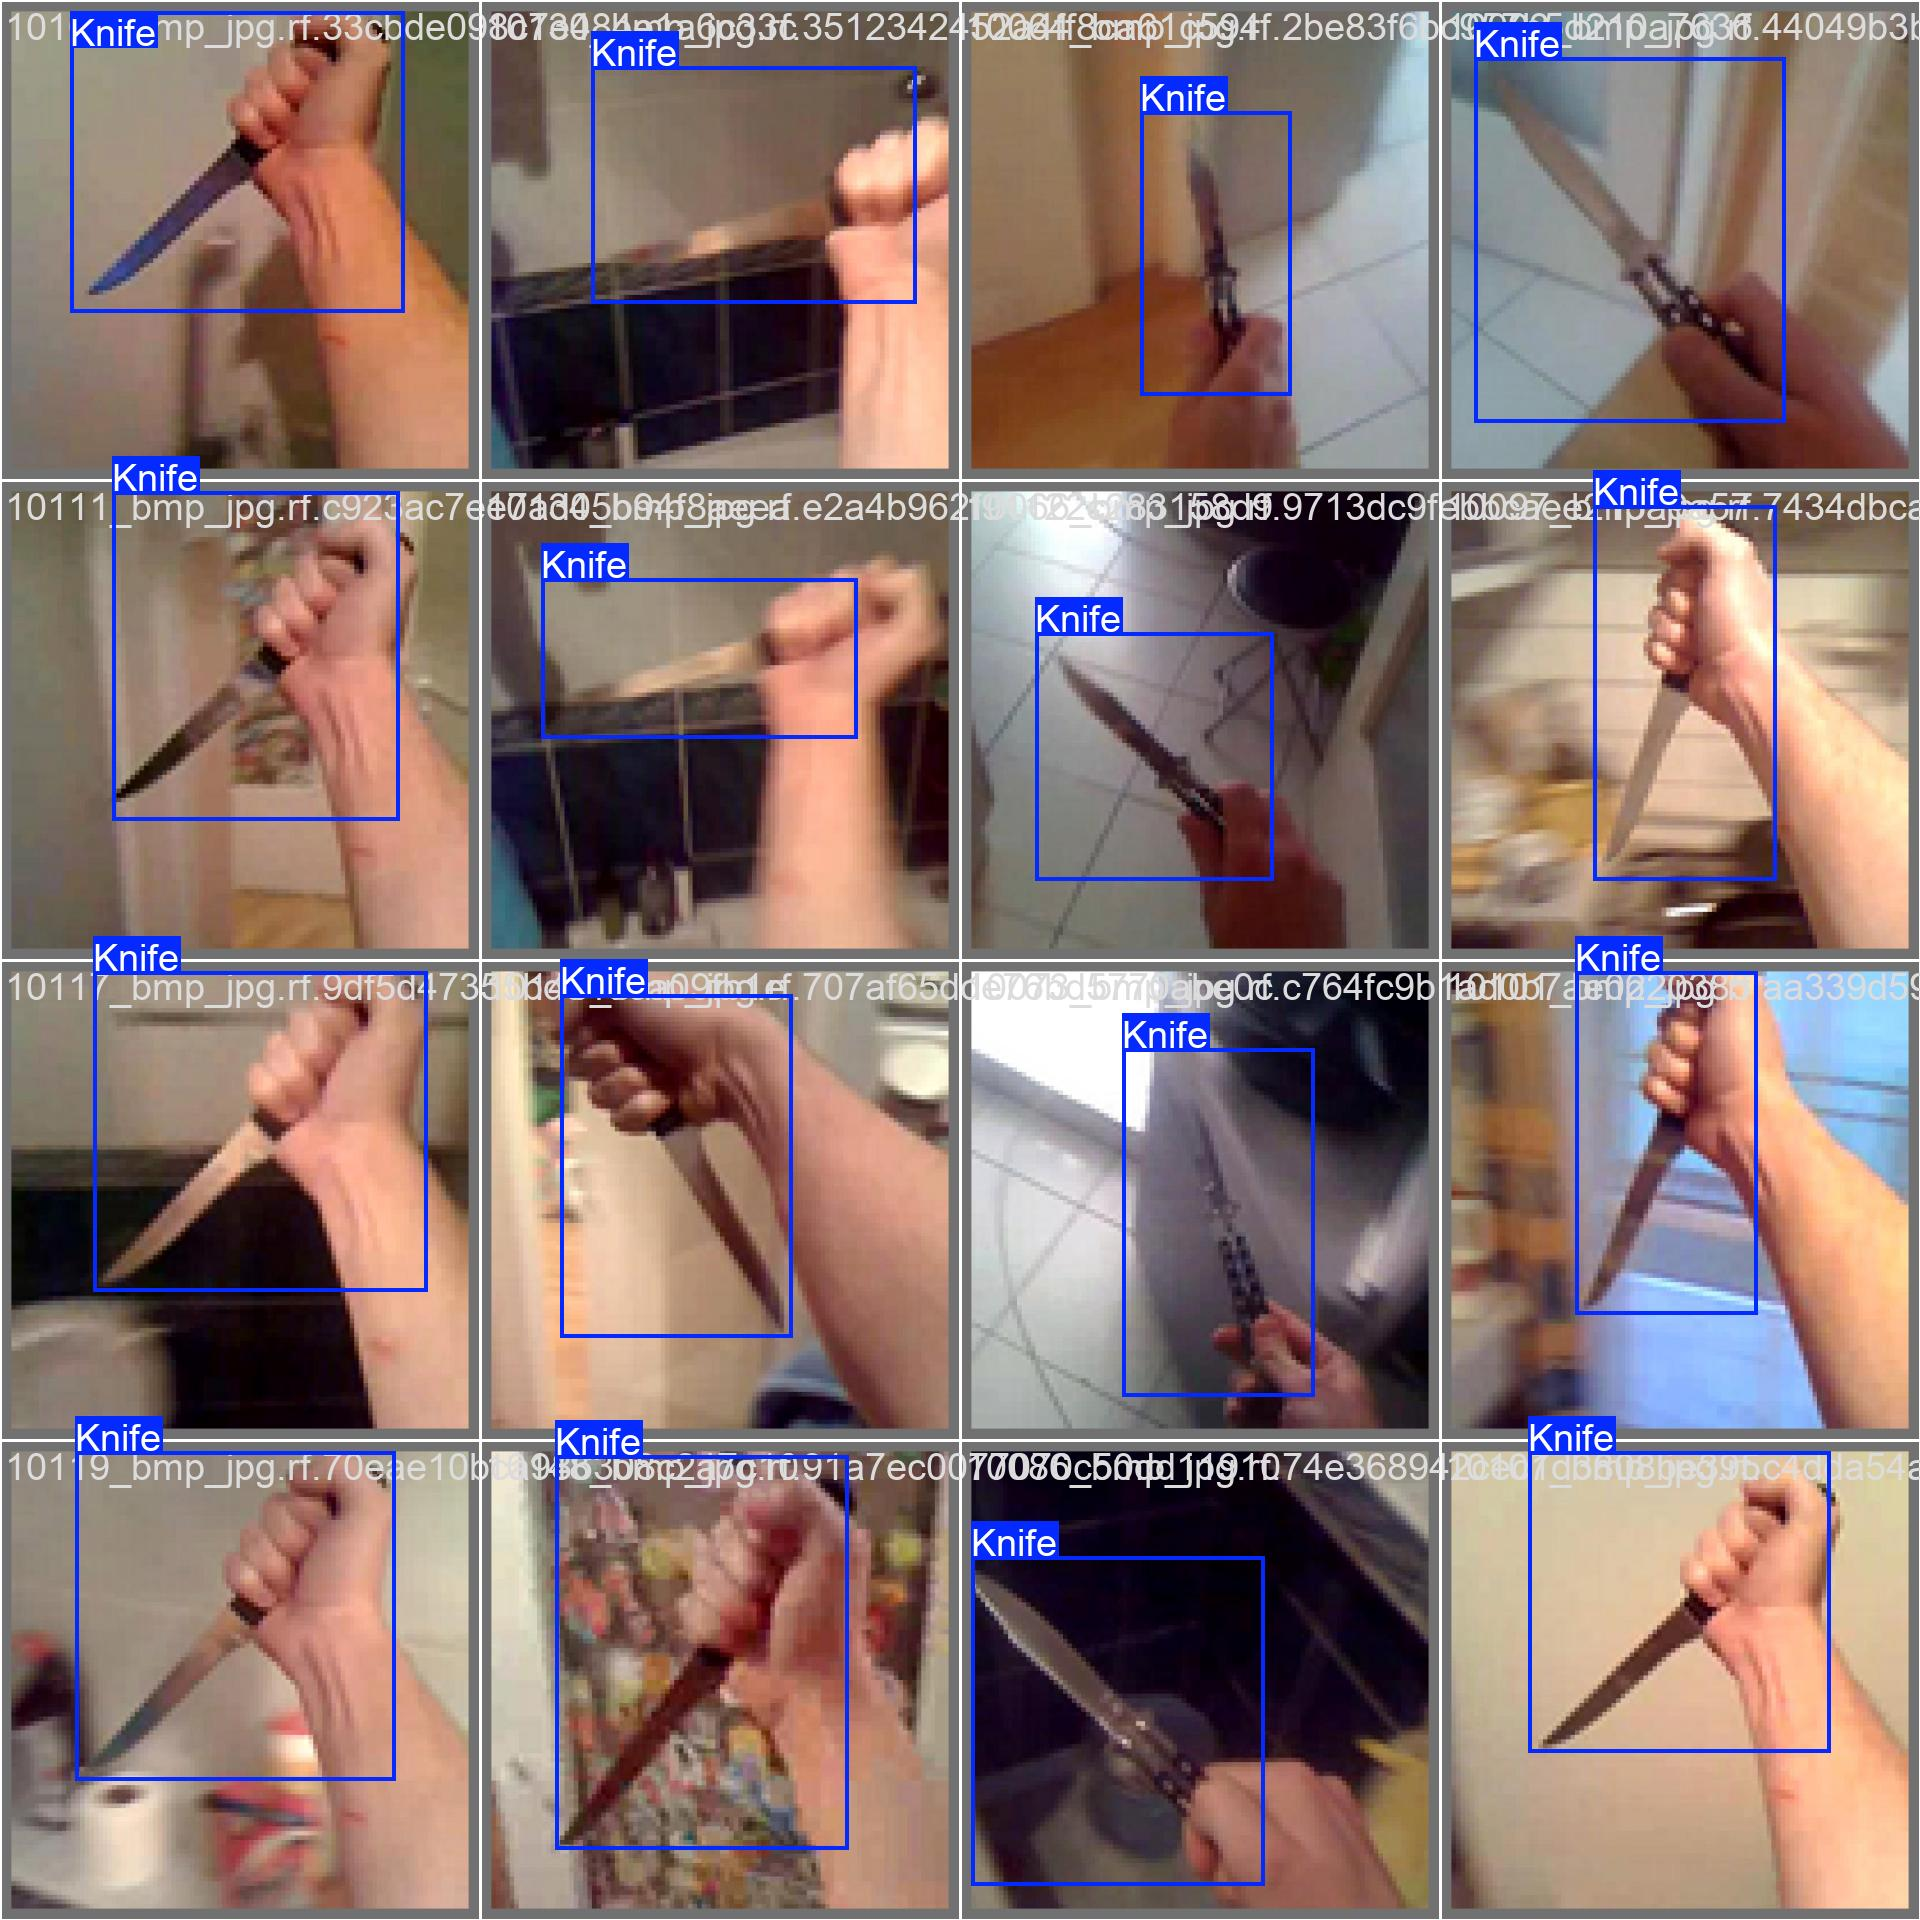

In [ ]:
display(Image(filename=f"/kaggle/working/runs/detect/train/val_batch1_labels.jpg", width=1000))

**Camera**

In [ ]:
from ultralytics import YOLO
model = YOLO("best.pt")

import cv2
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    boxes = results[0].boxes.xyxy
    confidences = results[0].boxes.conf
    class_ids = results[0].boxes.cls

    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])
        confidence = confidences[i]
        class_id = int(class_ids[i])

        label = f"{model.names[class_id]} {confidence:.2f}"
        color = (0, 255, 0)
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cv2.imshow("YOLO Real-Time Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 1233.8ms
Speed: 5.1ms preprocess, 1233.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cleaver, 1444.1ms
Speed: 132.3ms preprocess, 1444.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1052.0ms
Speed: 31.2ms preprocess, 1052.0ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 1020.7ms
Speed: 2.1ms preprocess, 1020.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 988.3ms
Speed: 2.0ms preprocess, 988.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 909.1ms
Speed: 1.0ms preprocess, 909.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 955.8ms
Speed: 0.0ms preprocess, 955.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 Knifes, 909.8ms
Speed: 0.0ms preproc

**One knife in image**


0: 448x640 1 Knife, 1087.0ms
Speed: 0.0ms preprocess, 1087.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


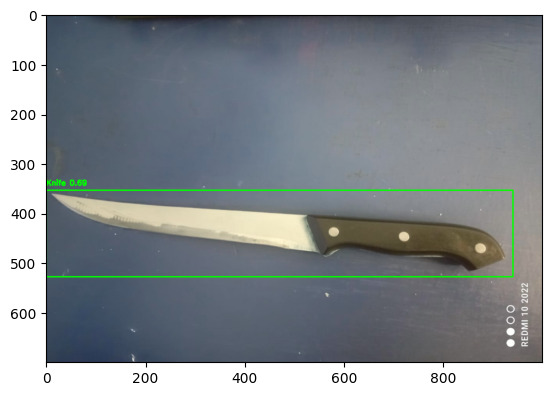

In [ ]:
from ultralytics import YOLO
model = YOLO("best.pt")

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('knife2.jpg')
img = cv2.resize(img, (1000,700))
results = model.predict(img)
boxes = results[0].boxes.xyxy
confidences = results[0].boxes.conf
class_ids = results[0].boxes.cls

for i in range(len(boxes)):
    x1, y1, x2, y2 = map(int, boxes[i])
    confidence = confidences[i]
    class_id = int(class_ids[i])

    label = f"{model.names[class_id]} {confidence:.2f}"
    color = (0, 255, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Two knife in image**


0: 512x640 2 Knifes, 1045.6ms
Speed: 7.6ms preprocess, 1045.6ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


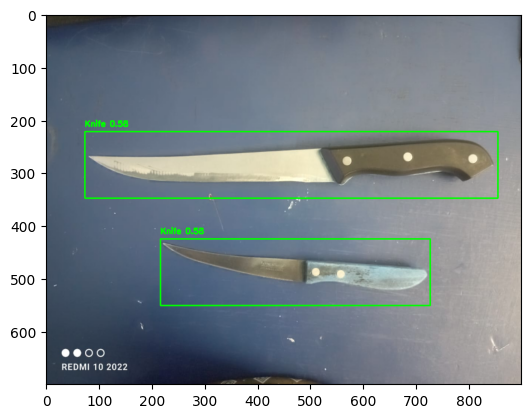

In [ ]:
from ultralytics import YOLO
model = YOLO("best.pt")

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('knife3.jpg')
img = cv2.resize(img, (900,700))
results = model.predict(img)
boxes = results[0].boxes.xyxy
confidences = results[0].boxes.conf
class_ids = results[0].boxes.cls

for i in range(len(boxes)):
    x1, y1, x2, y2 = map(int, boxes[i])
    confidence = confidences[i]
    class_id = int(class_ids[i])

    label = f"{model.names[class_id]} {confidence:.2f}"
    color = (0, 255, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()